Computing scores for subclaims. These will appear in out/factscore_subclaims_with_scores.jsonl


100%|██████████| 51/51 [00:00<00:00, 59238.30it/s]

Producing conformal plot: out/factscore_raw_a=0.95_fig.png


100%|██████████| 1/1 [00:02<00:00,  2.49s/it]


Producing conformal plot: out/factscore_ranking_a=0.95_fig.png


100%|██████████| 1/1 [00:02<00:00,  2.68s/it]


Producing calibration plot: out/factscore_raw_calibration_a=0.95.png


100%|██████████| 15/15 [00:26<00:00,  1.74s/it]


[0.9499999999999997, 0.9000000000000002, 0.8499999999999998, 0.8000000000000002, 0.75, 0.6999999999999998, 0.6500000000000002, 0.5999999999999998, 0.5499999999999999, 0.5, 0.4500000000000001, 0.4, 0.34999999999999976, 0.2999999999999999, 0.24999999999999997]
[0.9671923076923078, 0.9429230769230771, 0.9226153846153847, 0.9046153846153847, 0.9016153846153847, 0.8999230769230772, 0.9024615384615386, 0.9028846153846155, 0.8999230769230772, 0.9038846153846155, 0.9016538461538464, 0.9019230769230772, 0.8985000000000002, 0.9015000000000002, 0.899769230769231]


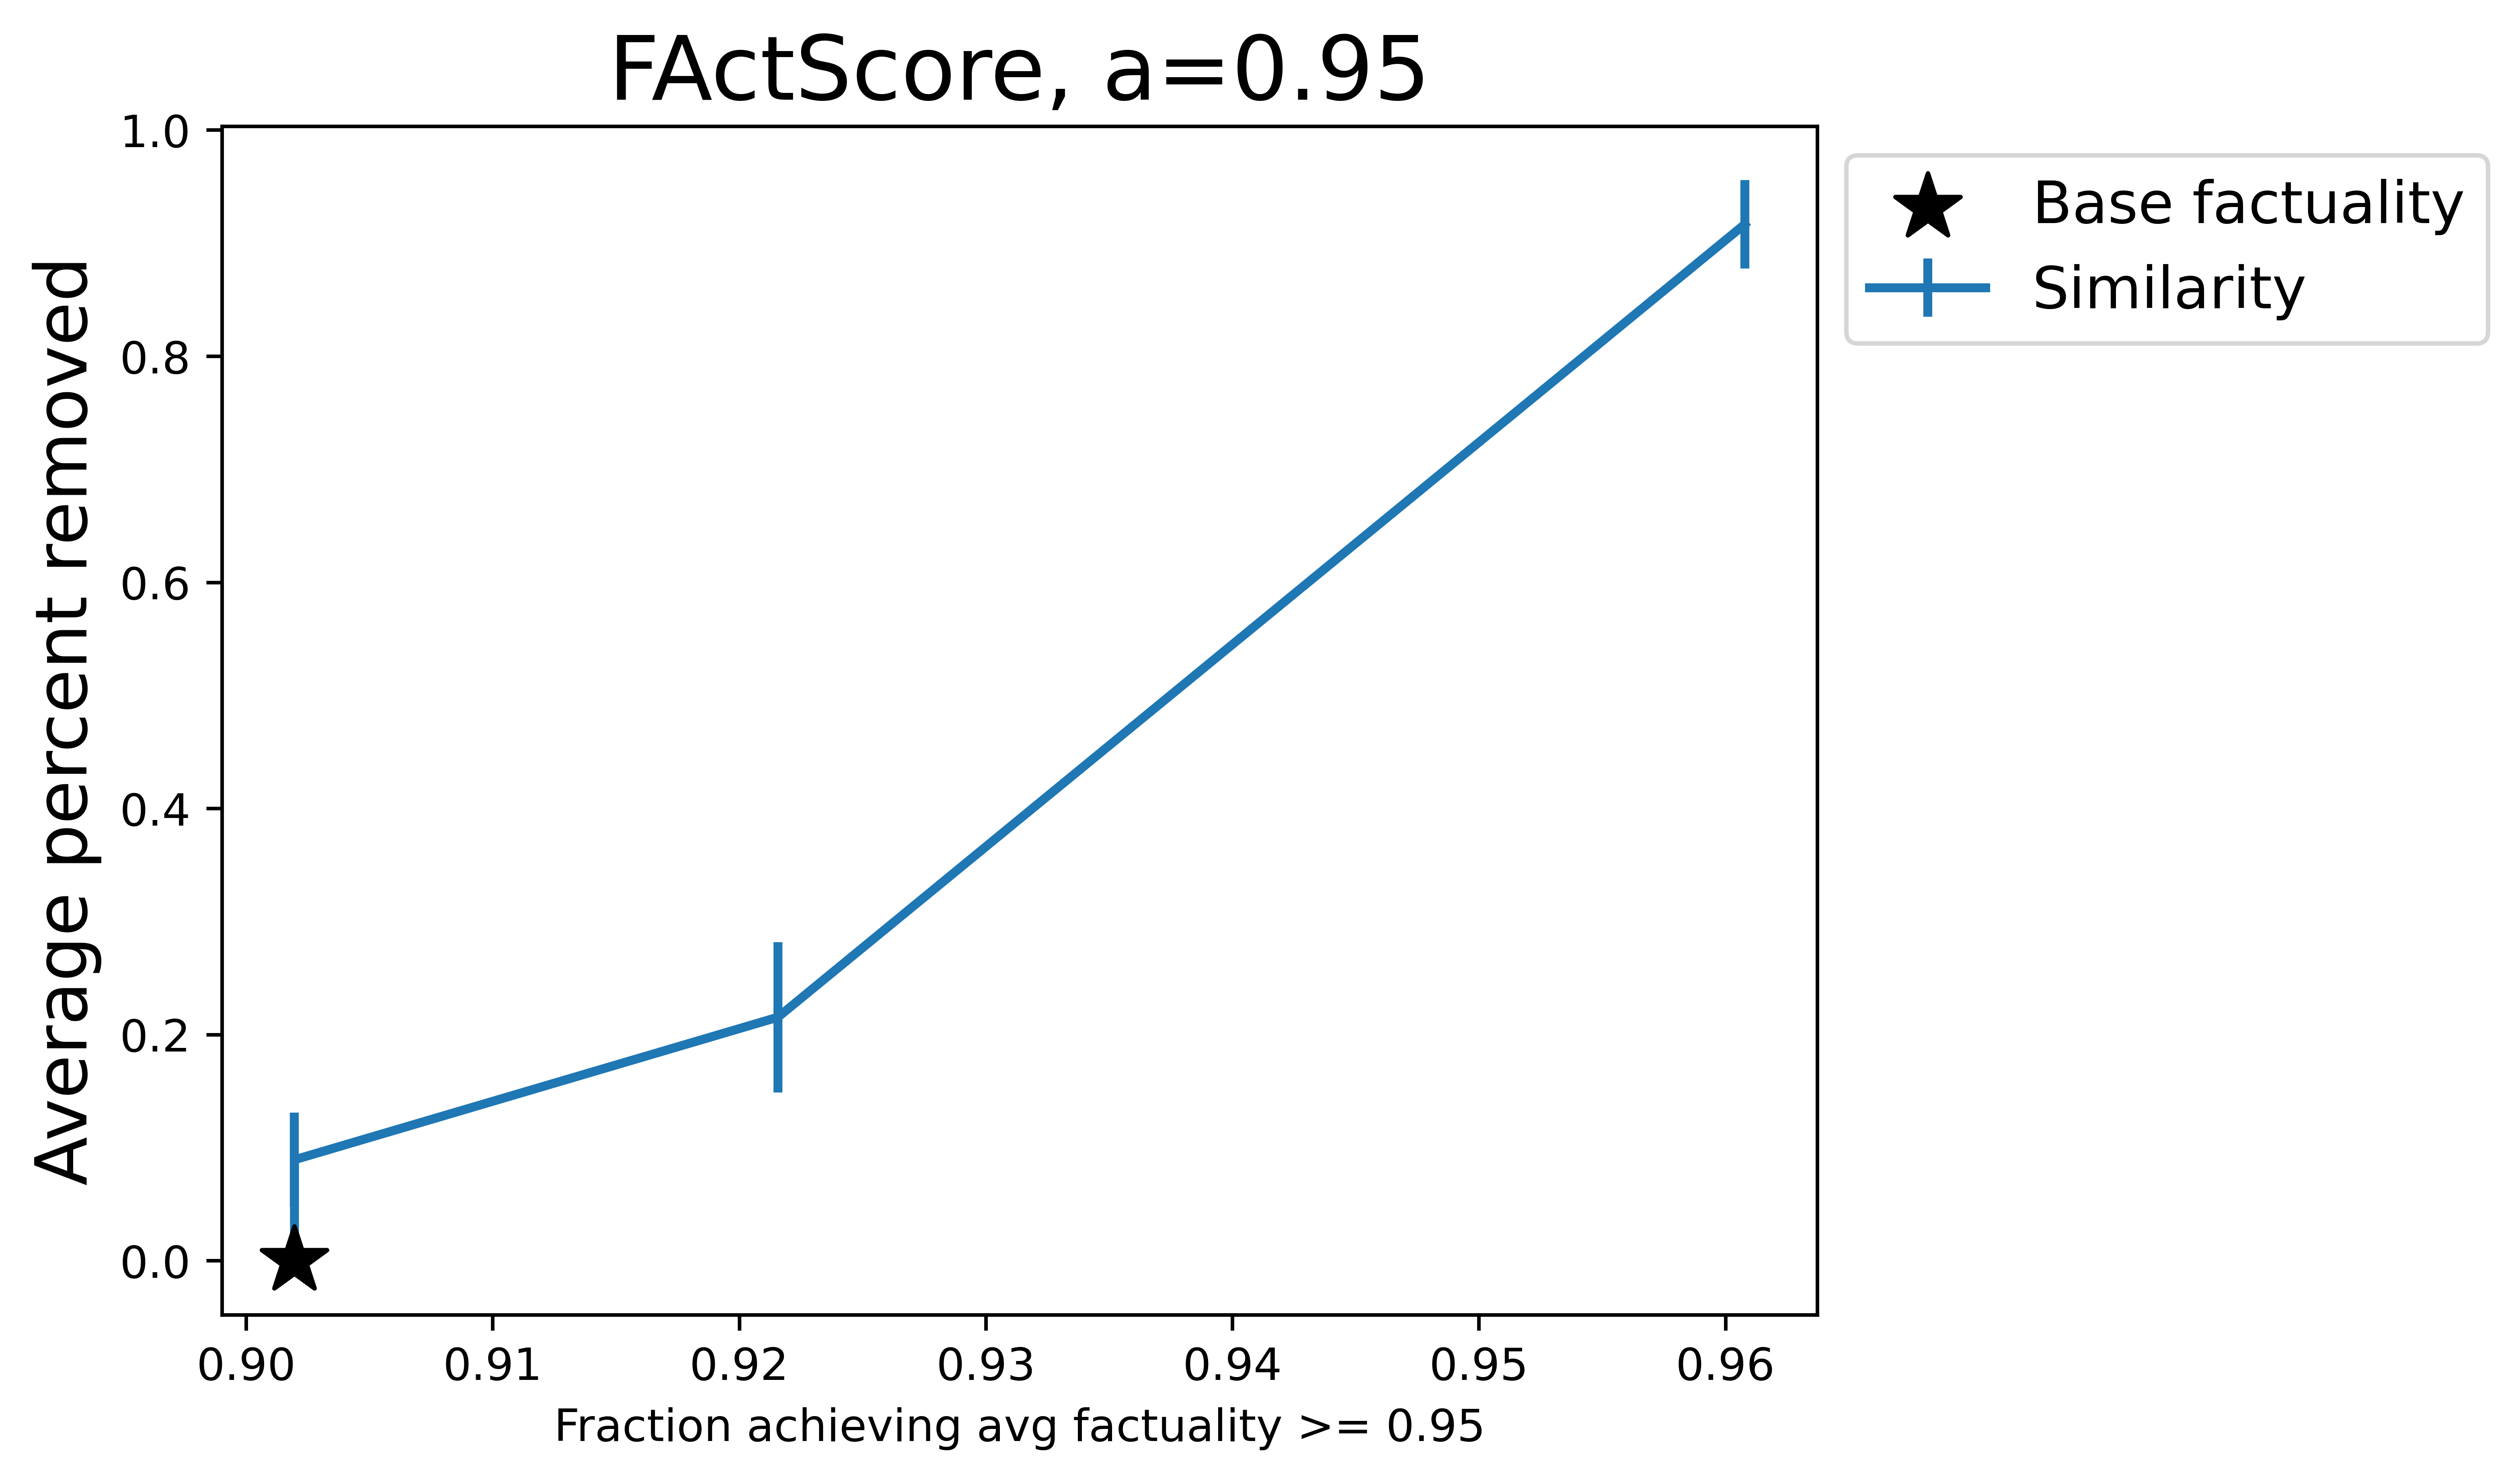

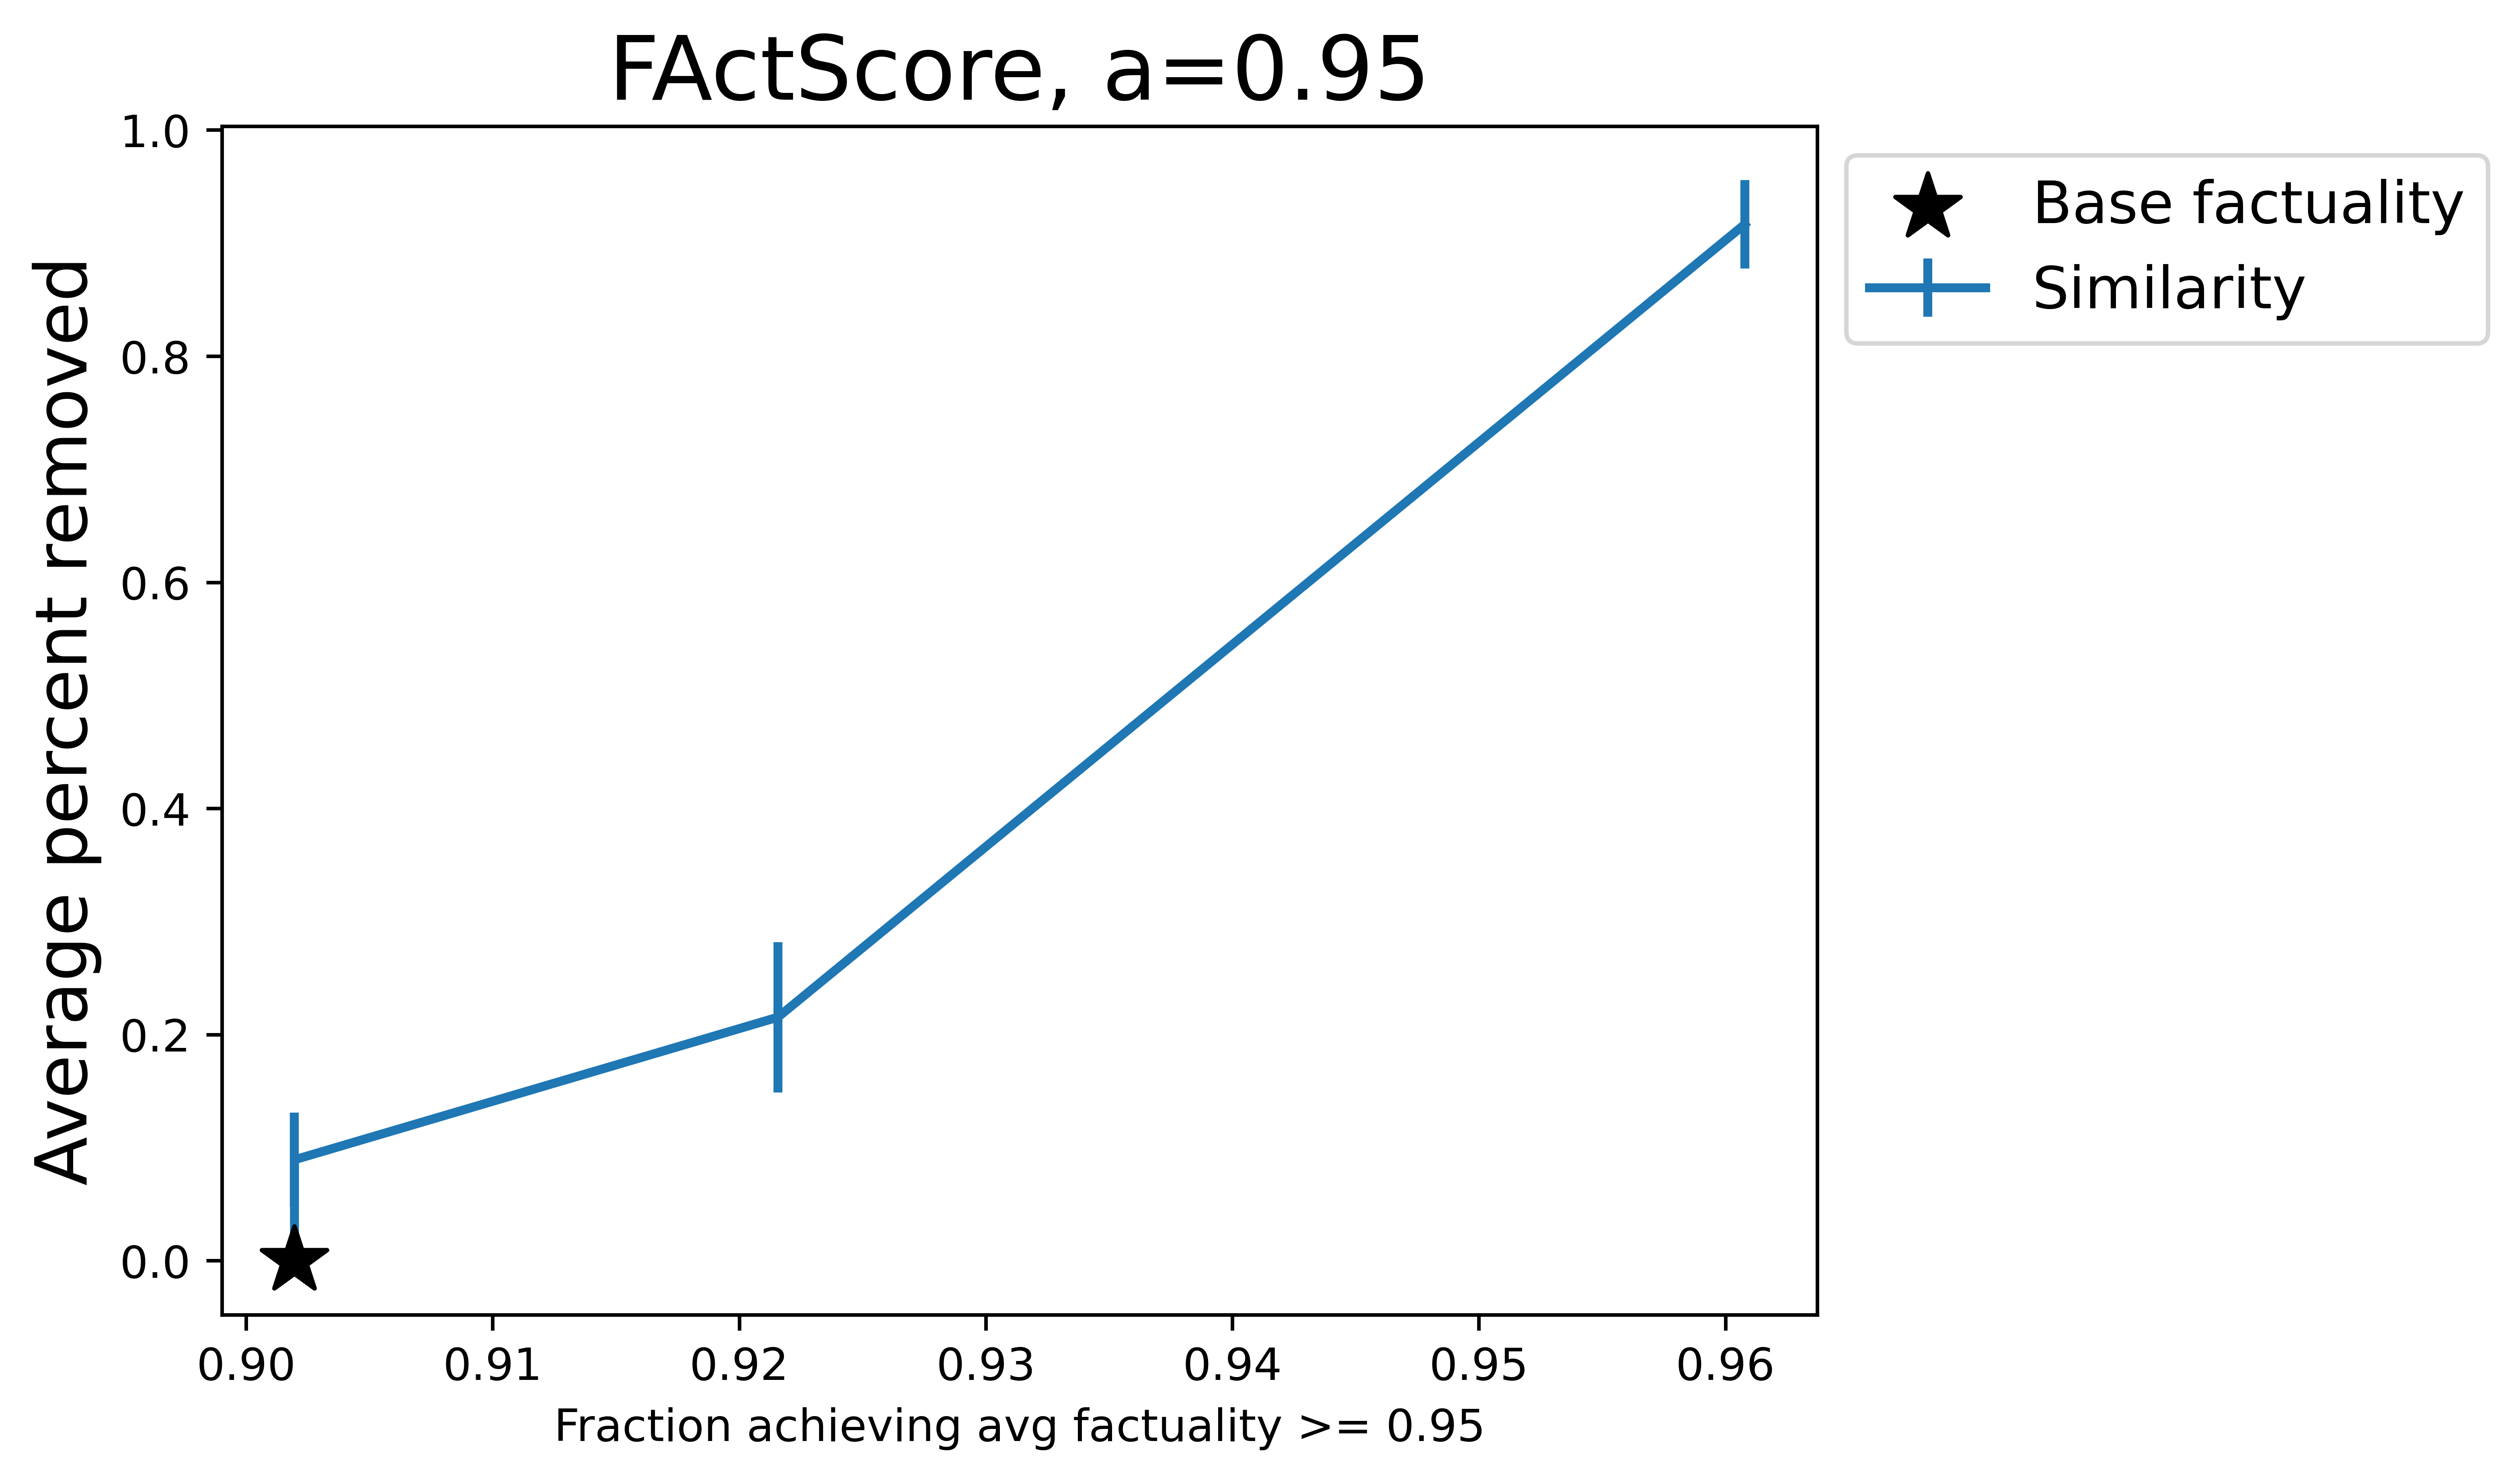

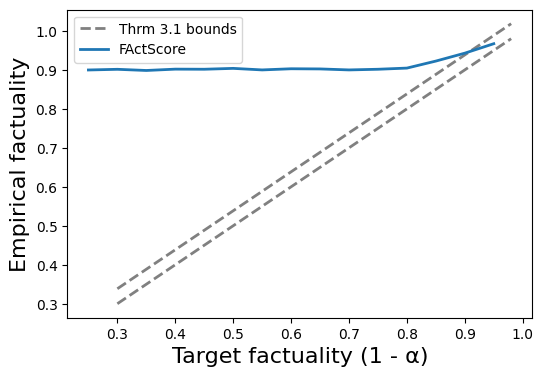

In [6]:
import io
import os

from openai import OpenAI
import numpy as np

from conformal.calibrate_thresh import analyze_dataset

if __name__ == "__main__":
    MODEL = "gpt-4"
    REQUIRED_FRAC_CORRECT = 0.95
    BREAKDOWN_PROMPT = "Please breakdown the following input into a set of small, independent claims, and return the output as a jsonl, where each line is {subclaim:[CLAIM], gpt-score:[CONF]}.\n The confidence score [CONF] should represent your confidence in the claim, where a 1 is obvious facts and results like 'The earth is round' and '1+1=2'. A 0 is for claims that are very obscure or difficult for anyone to know, like the birthdays of non-notable people. The input is: "

    ALPHA = 0.2
    CONFIDENCE_METHOD = "similarity"

    ALPHAS = np.arange(0.05, 0.80, 0.05)
    CONFIDENCE_METHODS_RAW = [
        "similarity",
    ]
    CONFIDENCE_METHODS_RANKING = [
        "similarity",
    ]

    os.environ["OAI_KEY"] = "sk-_pSL15MBmIF02afSLRiYusibq-lx-KS1Po3mc_8pKGT3BlbkFJumYKRgCENnSHXbQu-BEgu32RSIgjX29FTB2Qs474MA"
    # Get Open AI key.
    OAI_KEY = os.environ.get("OAI_KEY")
    if OAI_KEY is None:
        raise ValueError(
            "OpenAI key is not set - please set OAI_KEY to your OpenAI key (with command: export OAI_KEY=[OAI_KEY])"
        )
    OPENAI_CLIENT = OpenAI(api_key=OAI_KEY)


    #not used as alrteady provide annotation
    dataset_name = ""
    dataset_prefix = "factscore"

    analyze_dataset(
        dataset_prefix,
        dataset_name,
        OPENAI_CLIENT,
        MODEL,
        BREAKDOWN_PROMPT,
        CONFIDENCE_METHOD,
        CONFIDENCE_METHODS_RAW,
        CONFIDENCE_METHODS_RANKING,
        ALPHA,
        ALPHAS,
        REQUIRED_FRAC_CORRECT,
        merge=False,
        compute_single_threshold=True,
        create_plots=True,
        create_histogram=False,
        calib=True,
    )


In [1]:
from rag.faiss_manager import FAISSIndexManager

fm = FAISSIndexManager()
fm.is_indice_align()

True